# Selección de Factores

Correlaciones: relaciones lineales entre variables numéricas
Relaciones lineales con SelectKbest
Relaciones No lineales con SelectKbest

In [ ]:
#Lo más común es buscar relaciones lineales
#Importamos librerías básicas
import pandas as pd #manipulación dataframes
import numpy as np #matrices y vectores
import matplotlib.pyplot as plt #gráficas

In [ ]:
#Cargamos los datos
data = pd.read_csv("final_description_numeric.csv")
data.head()

Desc_Cargo_AUXILIAR ADMINSTRATIVO  Desc_Cargo_AUXILIAR AMBIENTAL  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   

   Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  Desc_Cargo_CADENERO I  \
0                                           0                      0   
1                                           0                      0   
2                                           0                      0   
3                                           0                      0   
4                                           0                      0   

   Desc_Cargo_CONDUCTOR DE VOLQUETA DAF  Desc_Cargo_CONTROLADOR VIAL  \
0                                     0                            0   
1                                     0                            0   
2                                     0                            0   
3                                     0                            0   
4                                     0                            0   

   Desc_Cargo_INGENIERO AUXILIAR  Desc_Cargo_INSPECTOR SST I  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   Desc_Cargo_OFICIAL I  Desc_Cargo_OFICIAL II  ...  houses_TP19_EE_E5  \
0                     1                      0  ...                0.0   
1                     0                      0  ...                0.0   
2                     1                      0  ...                0.0   
3                     1                      0  ...                0.0   
4                     0                      0  ...                0.0   

   houses_TP19_EE_E6  houses_TP15_1_OCU  houses_TP14_2_TIP  houses_TP9_2_USO  \
0                0.0           0.698113           0.000000          0.056604   
1                0.0           0.969231           0.538462          0.107692   
2                0.0           1.000000           0.000000          0.000000   
3                0.0           1.000000           0.000000          0.000000   
4                0.0           0.987654           0.679012          0.111111   

   houses_TP14_6_TIP  houses_TP15_2_OCU  houses_TP14_4_TIP  homes_TP27_PERSO  \
0                0.0                0.0                0.0            3.0000   
1                0.0                0.0                0.0            2.6250   
2                0.0                0.0                0.0            1.7500   
3                0.0                0.0                0.0            1.7500   
4                0.0                0.0                0.0            3.3125   

   causa_retiro  
0             1  
1             0  
2             1  
3             1  
4             1  

[5 rows x 95 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 95 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Desc_Cargo_AUXILIAR ADMINSTRATIVO           252 non-null    int64  
 1   Desc_Cargo_AUXILIAR AMBIENTAL               252 non-null    int64  
 2   Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  252 non-null    int64  
 3   Desc_Cargo_CADENERO I                       252 non-null    int64  
 4   Desc_Cargo_CONDUCTOR DE VOLQUETA DAF        252 non-null    int64  
 5   Desc_Cargo_CONTROLADOR VIAL                 252 non-null    int64  
 6   Desc_Cargo_INGENIERO AUXILIAR               252 non-null    int64  
 7   Desc_Cargo_INSPECTOR SST I                  252 non-null    int64  
 8   Desc_Cargo_OFICIAL I                        252 non-null    int64  
 9   Desc_Cargo_OFICIAL II                       252 non-null    int64  
 10  Desc_Cargo_OPE

In [ ]:
#Cargar librería para Profiling
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [ ]:
# Perfilado de datos
from ydata_profiling import ProfileReport

#este perfilado nos da mucha información mínima de cada una de las variables y saca alertas

profile_data=ProfileReport(data, minimal=True) # minimal=False
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 95/95 [00:01<00:00, 50.75it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Correlaciones
correlaciones=data.corr()
correlaciones

Desc_Cargo_AUXILIAR ADMINSTRATIVO  \
Desc_Cargo_AUXILIAR ADMINSTRATIVO                                    1.000000   
Desc_Cargo_AUXILIAR AMBIENTAL                                       -0.005646   
Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES                          -0.009818   
Desc_Cargo_CADENERO I                                               -0.005646   
Desc_Cargo_CONDUCTOR DE VOLQUETA DAF                                -0.020860   
...                                                                       ...   
houses_TP14_6_TIP                                                   -0.018982   
houses_TP15_2_OCU                                                    0.138091   
houses_TP14_4_TIP                                                   -0.008000   
homes_TP27_PERSO                                                     0.206505   
causa_retiro                                                         0.012179   

                                            Desc_Cargo_AUXILIAR AMBIENTAL  \
Desc_Cargo_AUXILIAR ADMINSTRATIVO                               -0.005646   
Desc_Cargo_AUXILIAR AMBIENTAL                                    1.000000   
Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES                      -0.006928   
Desc_Cargo_CADENERO I                                           -0.003984   
Desc_Cargo_CONDUCTOR DE VOLQUETA DAF                            -0.014721   
...                                                                   ...   
houses_TP14_6_TIP                                               -0.013395   
houses_TP15_2_OCU                                                0.058330   
houses_TP14_4_TIP                                               -0.005646   
homes_TP27_PERSO                                                 0.039992   
causa_retiro                                                     0.072297   

                                            Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  \
Desc_Cargo_AUXILIAR ADMINSTRATIVO                                            -0.009818   
Desc_Cargo_AUXILIAR AMBIENTAL                                                -0.006928   
Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES                                    1.000000   
Desc_Cargo_CADENERO I                                                        -0.006928   
Desc_Cargo_CONDUCTOR DE VOLQUETA DAF                                         -0.025600   
...                                                                                ...   
houses_TP14_6_TIP                                                             0.468478   
houses_TP15_2_OCU                                                            -0.034625   
houses_TP14_4_TIP                                                            -0.009818   
homes_TP27_PERSO                                                              0.191714   
causa_retiro                                                                  0.051872   

                                            Desc_Cargo_CADENERO I  \
Desc_Cargo_AUXILIAR ADMINSTRATIVO                       -0.005646   
Desc_Cargo_AUXILIAR AMBIENTAL                           -0.003984   
Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES              -0.006928   
Desc_Cargo_CADENERO I                                    1.000000   
Desc_Cargo_CONDUCTOR DE VOLQUETA DAF                    -0.014721   
...                                                           ...   
houses_TP14_6_TIP                                       -0.013395   
houses_TP15_2_OCU                                       -0.019911   
houses_TP14_4_TIP                                       -0.005646   
homes_TP27_PERSO                                        -0.021654   
causa_retiro                                            -0.055107   

                                            Desc_Cargo_CONDUCTOR DE VOLQUETA DAF  \
Desc_Cargo_AUXILIAR ADMINSTRATIVO                                      -0.020860   
Desc_Cargo_AUXILIAR AMBIENTAL                                       

In [ ]:
#Correlaciones con la variable de interés
cor_variable_interes=correlaciones.loc['causa_retiro']
cor_variable_interes.nlargest(20)

causa_retiro             1.000000
PERSONAS_S               0.172550
permanencia              0.165698
persons_TP51POSTGR       0.152687
TP14_1_TIP               0.133965
TP9_2_1_MI               0.130923
persons_TP34_6_EDA       0.124290
TP9_3_5_NO               0.117824
Desc_Cargo_OFICIAL I     0.114978
TP19_EE_2                0.113591
Desc_Cargo_SOLDADOR I    0.105528
houses_TP14_4_TIP        0.102447
TP19_GAS_2               0.087684
TP9_2_9_MI               0.081379
id_tipo_contrato_5.0     0.078089
anios                    0.073727
houses_TP9_2_USO         0.073696
salario_mes              0.072890
houses_TP19_EE_E6        0.072671
homes_TP27_PERSO         0.072363
Name: causa_retiro, dtype: float64

In [ ]:
# Valor absoluto y ordenamiento descendente
#necesito sacar valor absoluto y me lo organizar descendentemente
ind= cor_variable_interes.abs().sort_values(ascending=False).index
cor_variable_interes[ind].head(20)

causa_retiro                   1.000000
PERSONAS_S                     0.172550
permanencia                    0.165698
persons_TP51POSTGR             0.152687
persons_TP34_8_EDA            -0.140283
TP14_1_TIP                     0.133965
TP9_2_1_MI                     0.130923
persons_TP34_6_EDA             0.124290
TP9_3_5_NO                     0.117824
persons_TP34_9_EDA            -0.116738
Desc_Cargo_OFICIAL I           0.114978
TP19_EE_2                      0.113591
Desc_Cargo_SOLDADOR I          0.105528
houses_TP14_4_TIP              0.102447
TP19_GAS_2                     0.087684
CD_LC_CM                      -0.084107
TP9_2_9_MI                     0.081379
Desc_Cargo_INSPECTOR SST I    -0.078089
Desc_Cargo_CONTROLADOR VIAL   -0.078089
id_tipo_contrato_5.0           0.078089
Name: causa_retiro, dtype: float64

In [ ]:
#Dependencia lineal

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif, mutual_info_classif, mutual_info_regression

X= data.drop('causa_retiro', axis=1) #axis es que saca porque ahí no esta la variable objetivo
Y= data['causa_retiro']

bestfeatures = SelectKBest(score_func=f_classif, k=2)
#regresiones lineales en clasificación y k son la cantidad de relavantes que quiero obtener
bestfeatures.fit(X, Y)
bestfeatures.get_feature_names_out()

array(['PERSONAS_S', 'permanencia'], dtype=object)

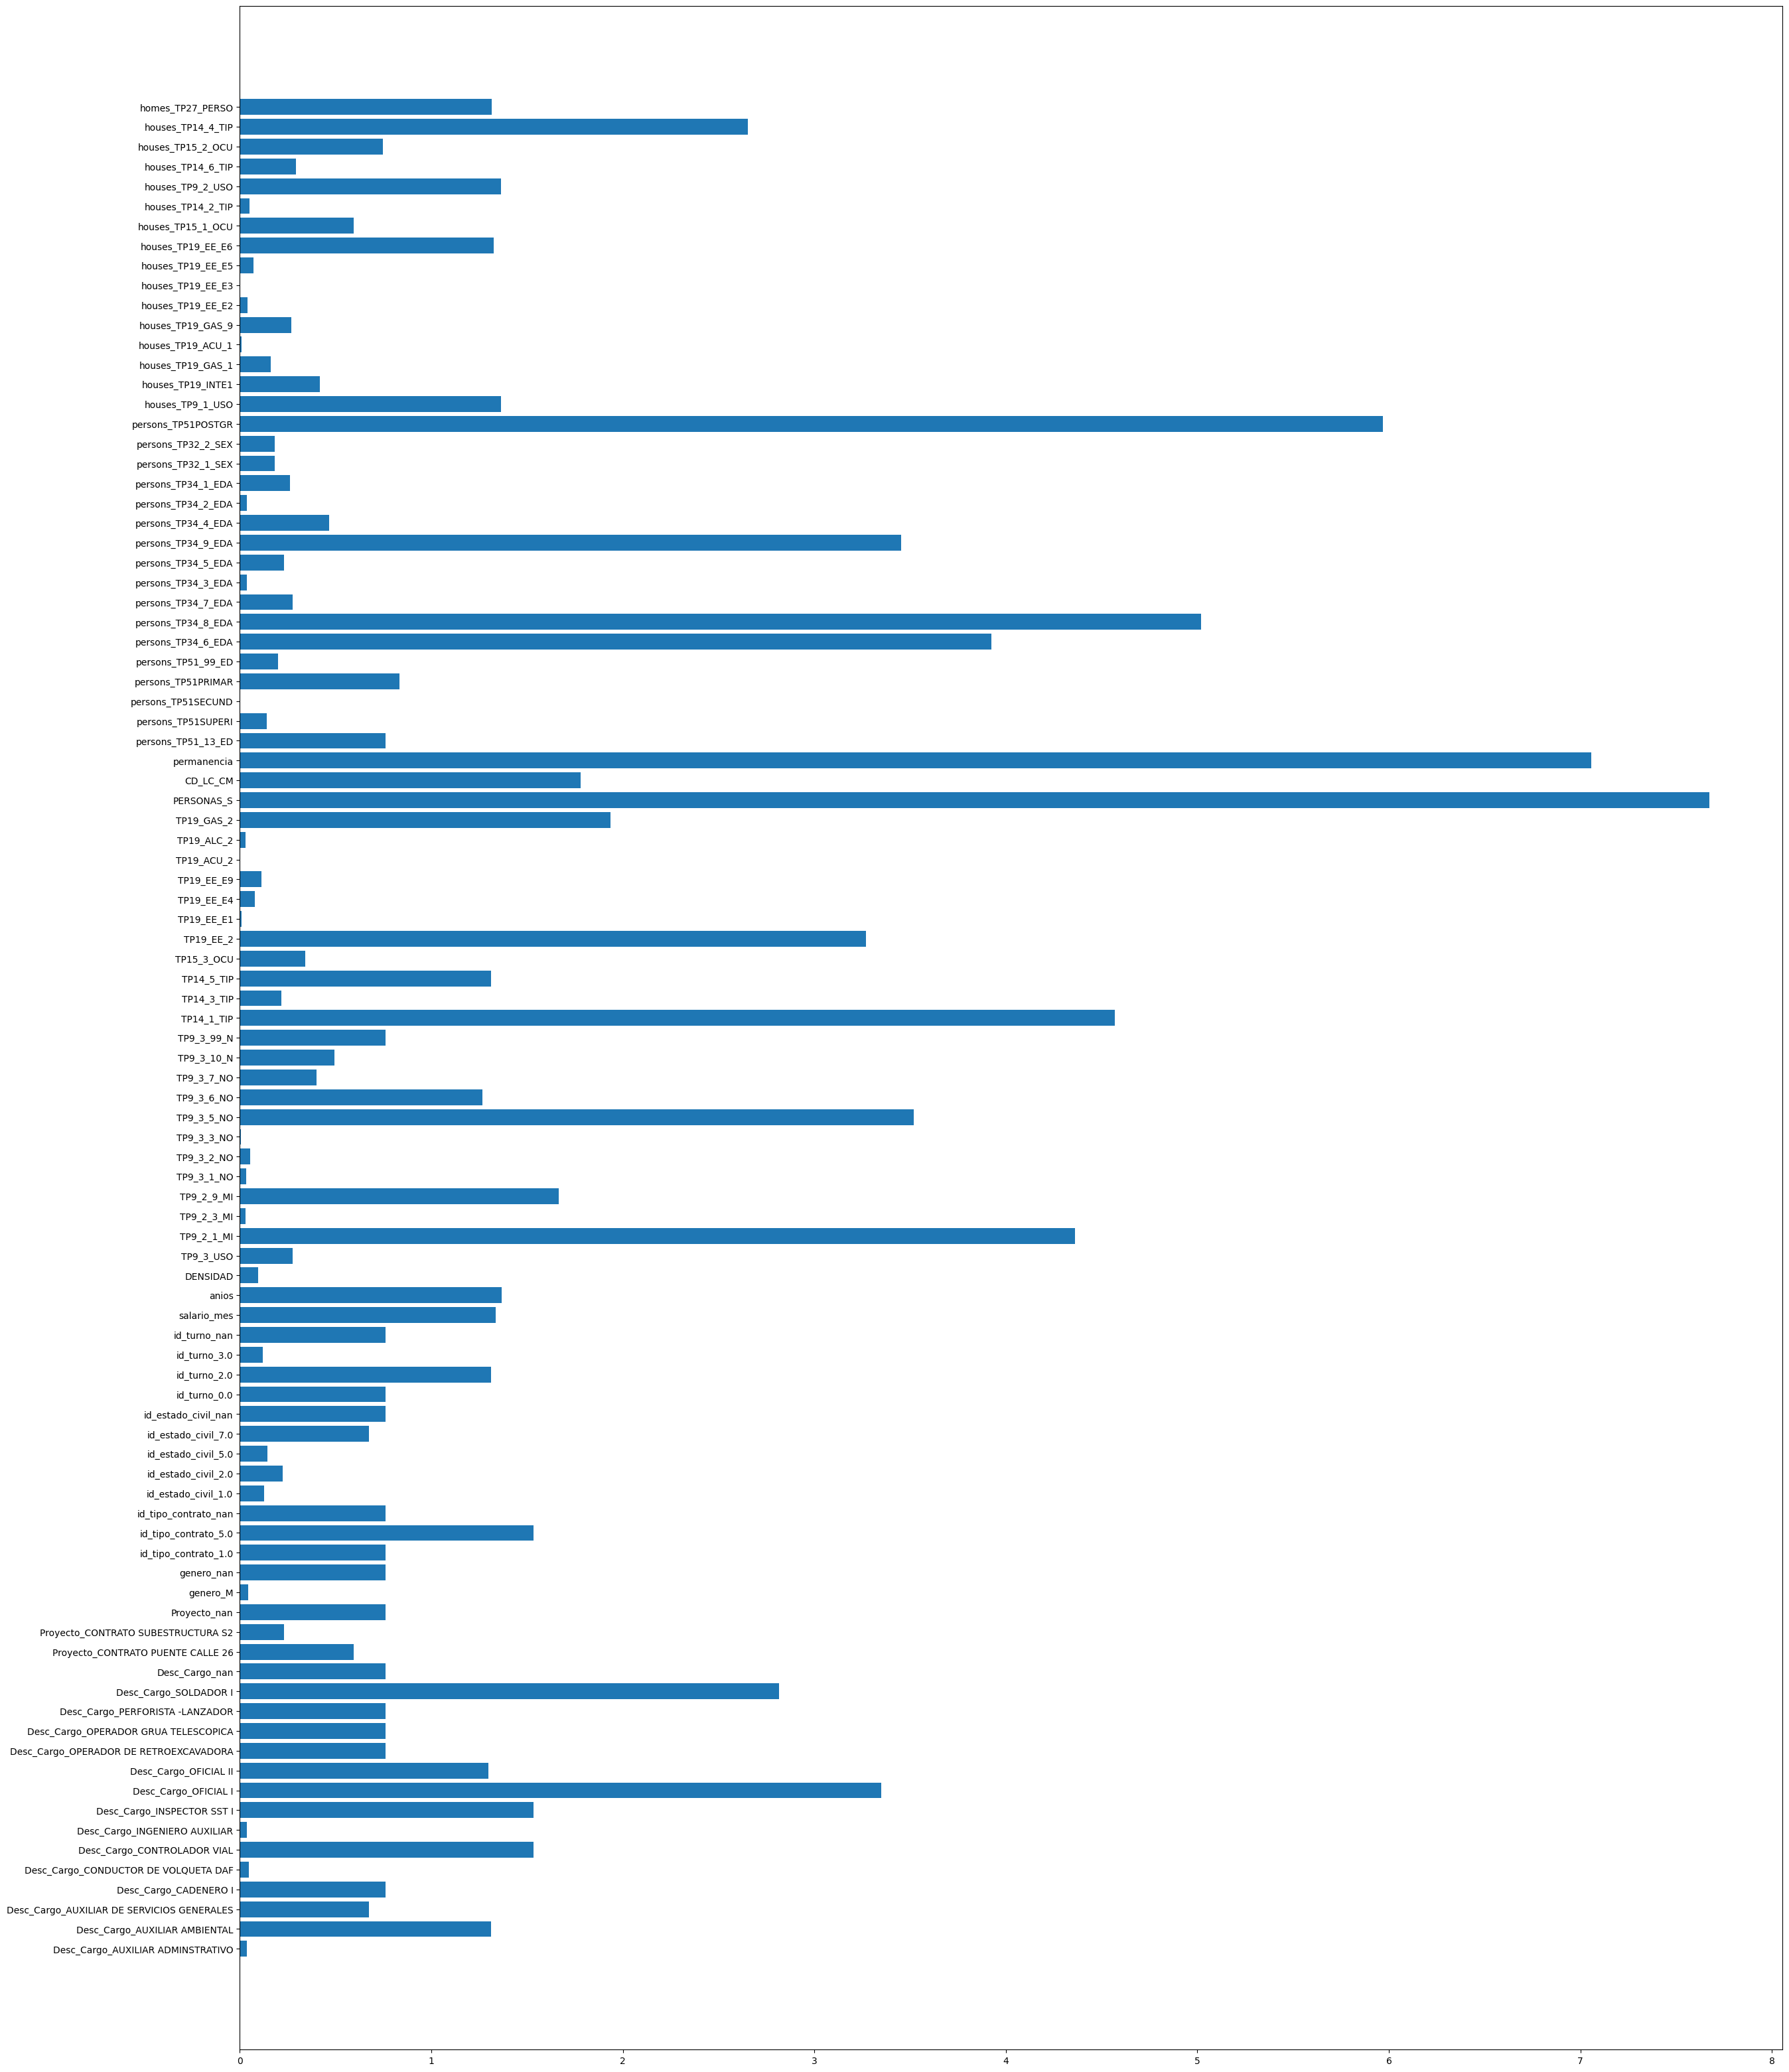

In [ ]:
plt.figure(figsize=(30, 40))
plt.barh(y = X.columns, width=bestfeatures.scores_)
plt.savefig("grafico.png", dpi=300, bbox_inches="tight")

In [ ]:
#Dependencia no lineal
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif, mutual_info_classif, mutual_info_regression

X= data.drop('causa_retiro', axis=1)
Y= data['causa_retiro']

bestfeatures = mutual_info_classif(X, Y, random_state=42)
#random_state es el valor de la semilla
bestfeatures

array([0.01275328, 0.        , 0.        , 0.        , 0.        ,
       0.03788697, 0.01574683, 0.00014179, 0.        , 0.04332584,
       0.01953284, 0.        , 0.00125088, 0.        , 0.        ,
       0.        , 0.00107843, 0.        , 0.        , 0.04081556,
       0.11237793, 0.01571984, 0.03600655, 0.        , 0.04843923,
       0.01619637, 0.        , 0.00476915, 0.00038407, 0.00338671,
       0.        , 0.00357764, 0.        , 0.        , 0.05503947,
       0.03195583, 0.01660359, 0.        , 0.02820896, 0.        ,
       0.        , 0.        , 0.        , 0.00515343, 0.        ,
       0.        , 0.        , 0.07187734, 0.        , 0.        ,
       0.03772865, 0.        , 0.06313845, 0.01690095, 0.        ,
       0.01504616, 0.01089324, 0.05732058, 0.        , 0.        ,
       0.12872094, 0.01770769, 0.05651496, 0.02006369, 0.05315504,
       0.        , 0.00560298, 0.        , 0.        , 0.04609148,
       0.03449553, 0.02810497, 0.054207  , 0.00771151, 0.00865

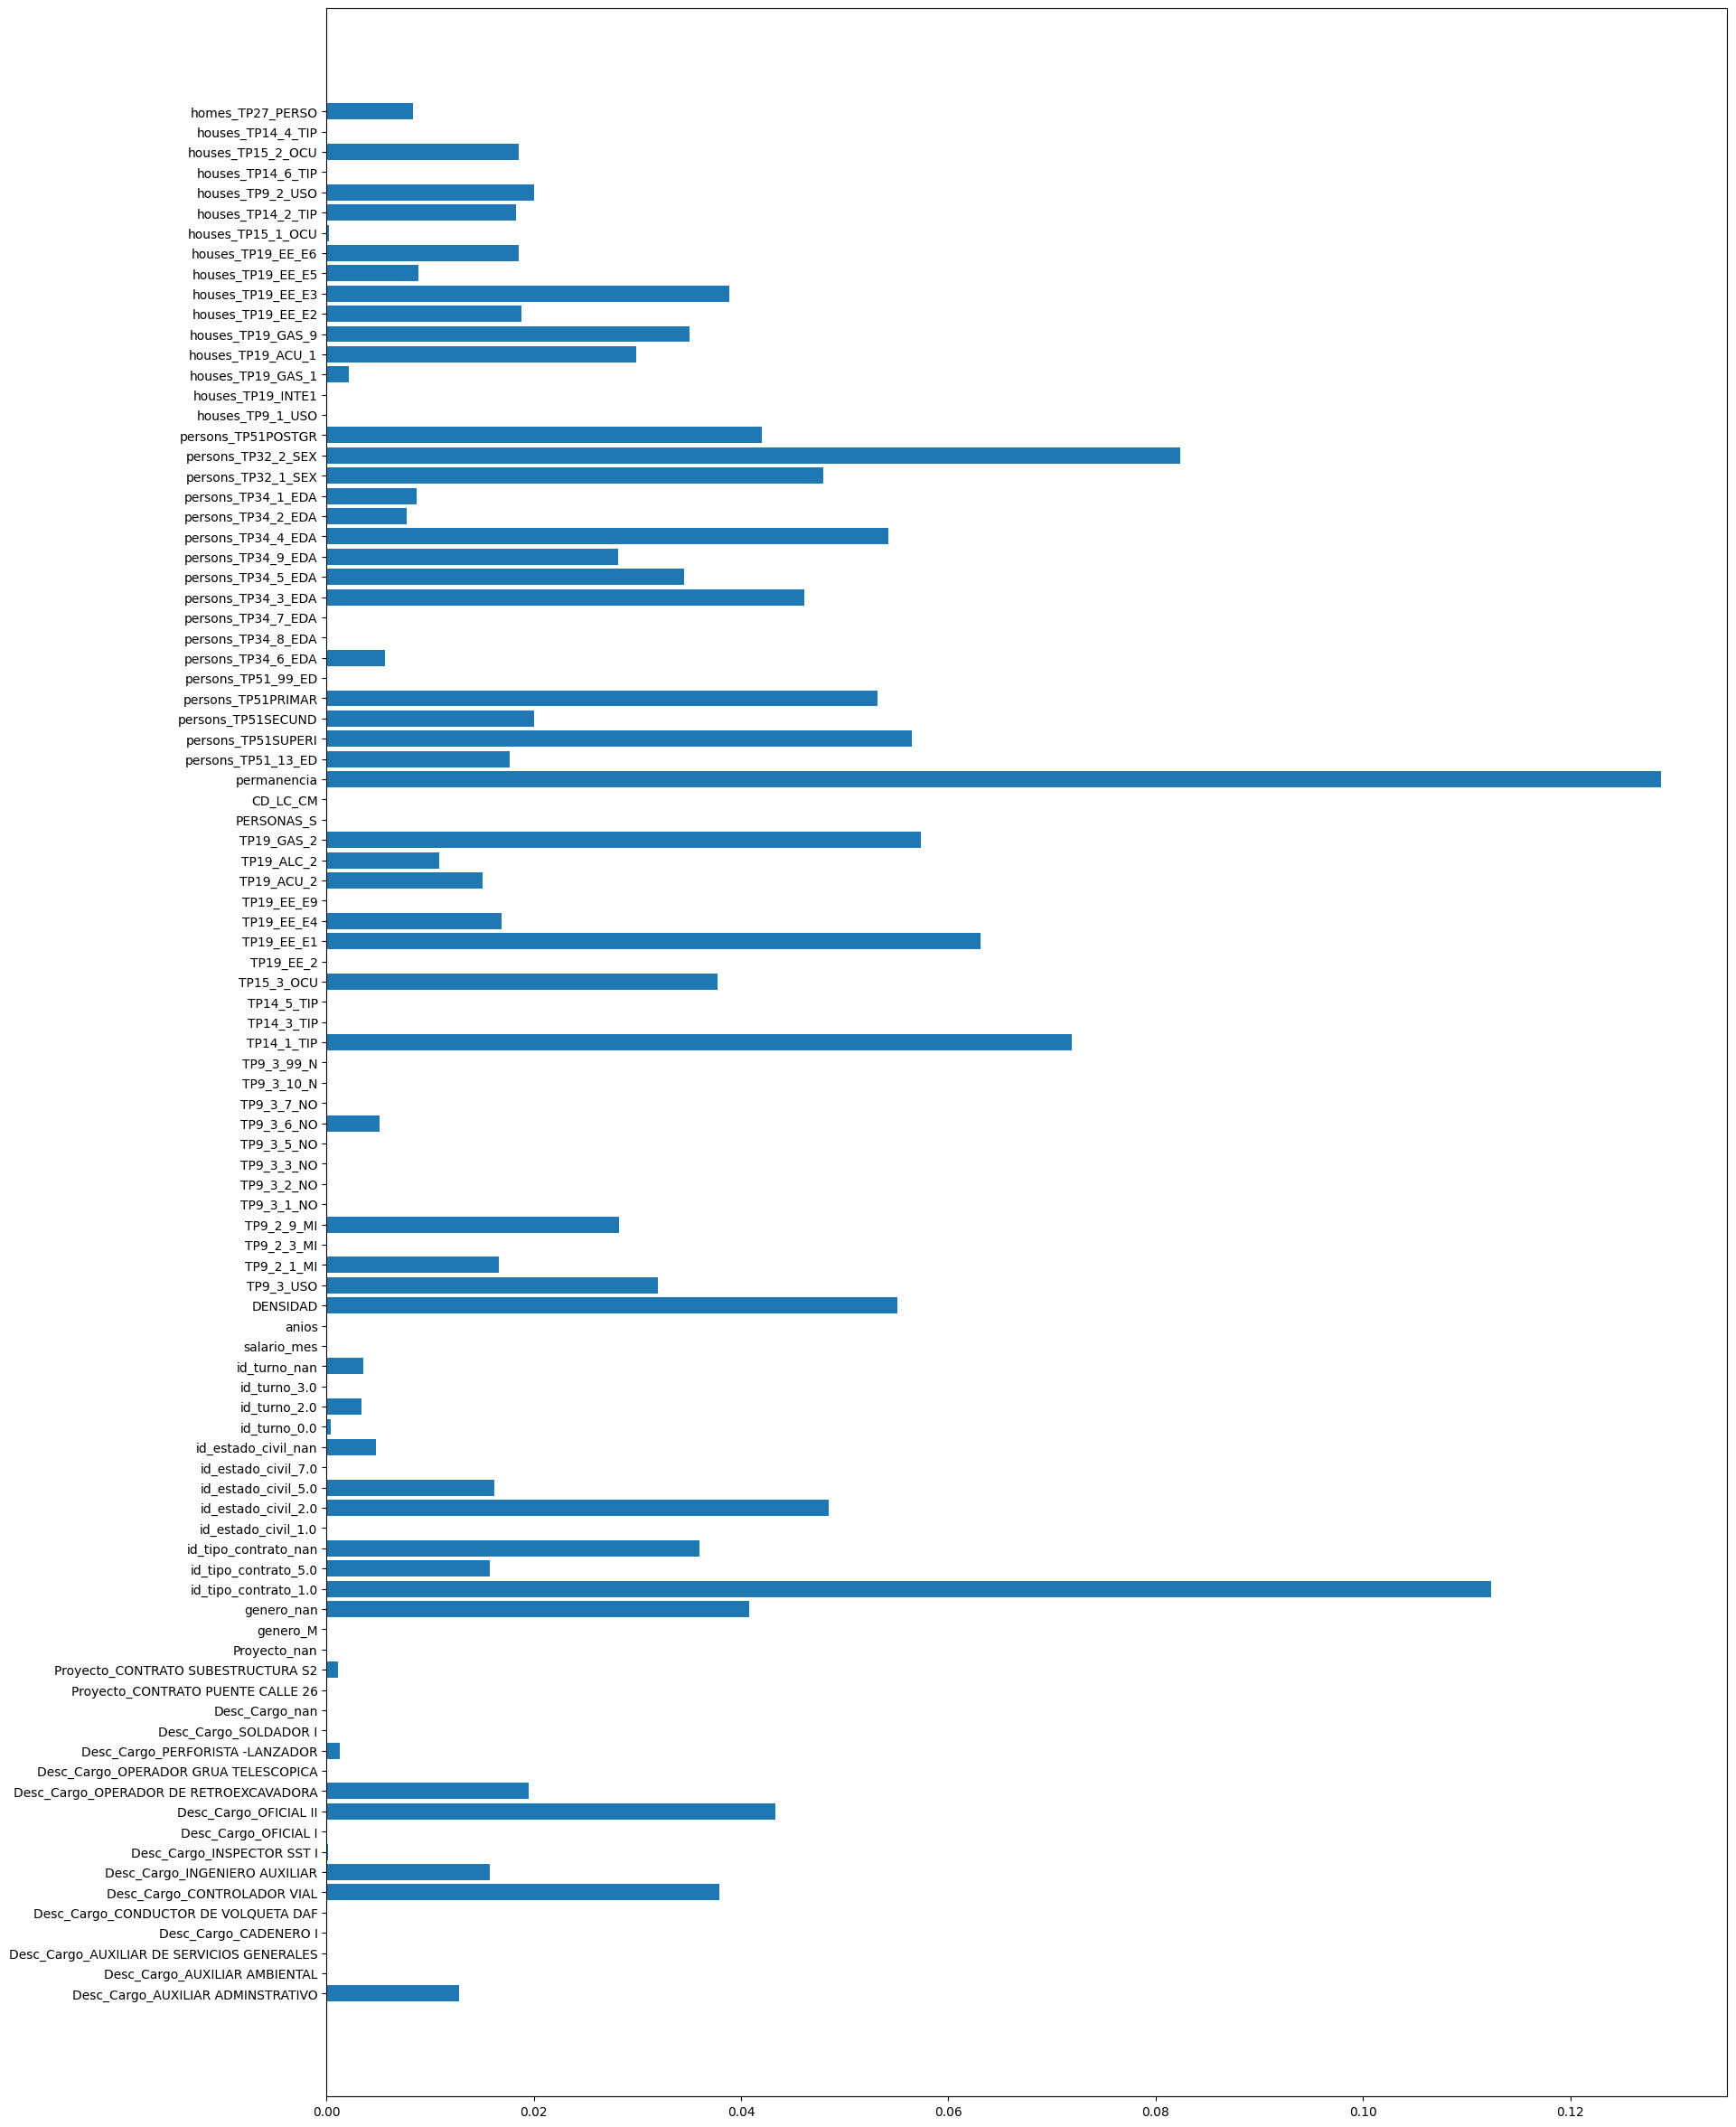

In [ ]:
plt.figure(figsize=(20, 30))
plt.barh(y = X.columns, width=bestfeatures)
plt.savefig("grafico.png", dpi=300, bbox_inches="tight")